## OVERVIEW
---
* Used Princical Component Analysis to Reduce the data dimensionality.
* Standardized the features by using StandardScaler
* Hyperparameter tuning of estimators
* Accuracy Test of predictive models.

In [59]:
#VIZ LIBRARY
import pandas as pd
from pandas import plotting
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Preprocessing
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from bayes_opt import BayesianOptimization

#MODELS
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.cluster import KMeans, AgglomerativeClustering
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [8]:
#Load iris dataset
df = load_iris()
X, y = df.data, df.target

### DATA PROCESSING
---

In [20]:
#Standardize the features
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(X)

#### DIMENSIONALITY REDUCTION

In [25]:
#Applying Principal Component Analysis
pca = PCA(n_components=2).fit(scaled_feat)
X_pca = pca.transform(scaled_feat)
#Cheking the shape of features
X_pca.shape

(150, 2)

Text(0, 0.5, 'Component 2')

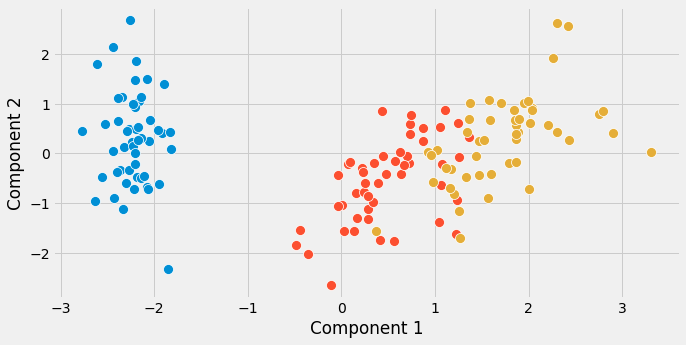

In [31]:
#Plot the results
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(x = X_pca[y ==0,0], y=X_pca[y==0,1], s=100)
sns.scatterplot(x = X_pca[y ==1,0], y=X_pca[y==1,1], s=100)
sns.scatterplot(x = X_pca[y ==2,0], y=X_pca[y==2,1], s=100)

plt.xlabel('Component 1')
plt.ylabel('Component 2')

### INSIGHT
---
* By applying Principal Component Analysis, the dimension of data has been reduced without losing that much information and now training the data will be much faster.

## PREDICTIVE MODELING
---

### SUPPORT VECTOR CLASSIFIER
---

In [39]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=101)

#### HYPERPARAMETER TUNING

In [ ]:
#Applying GridSearchCV to get the best parameters
params_grid = {'C':[0.1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}
#I'll use SVC as my estimator to predict the output
grid = GridSearchCV(SVC(), params_grid, verbose=3)
grid.fit(X_train, y_train)

#### PREDICT THE TEST DATA

In [44]:
#Predict the test data
predictions = grid.predict(X_test)
#accuracy test
svc_accu = accuracy_score(y_test, predictions)
print('Model Accuracy: ', round(svc_accu*100, 2), '%')

Model Accuracy:  93.33 %


#### CLASSIFICATION REPORT

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      0.92      0.92        12
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### XGBCLASSIFIER PREDICTIVE MODELLING
---

#### HYPERPARAMETER TUNING

In [79]:
from scipy.stats import uniform

#RandomSearchCV
# Hyperparameters to tune and their ranges
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}

rs = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=25)

# Run random search for 25 iterations
rs.fit(X_train, y_train);

#### PREDICT THE TEST DATA

In [80]:
#Predict the test data
predictions = rs.predict(X_test)
#accuracy test
xgb_accu = accuracy_score(y_test, predictions)
print('Model Accuracy: ', round(xgb_accu*100, 2), '%')

Model Accuracy:  90.0 %


#### CLASSIFICATION REPORT

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.83      0.87        12
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



* SVC have a better results than XGBClassifier that is with RandomSearchCV